
# Introduction to Sentiment Analysis
Sentiment analysis is an NLP technique used to determine whether data is positive, negative, or neutral. It's widely applied in monitoring brand and product sentiment in customer feedback, and understanding customer needs.

In [ ]:
import spacy
from textblob import TextBlob
nlp = spacy.load('en_core_web_sm')

spaCy doesn't provide a direct sentiment analysis function, but you can use it for preprocessing before applying a sentiment analysis model. Here's an example of preprocessing. (Remember to go back to the previous session lab to have a recap about spacy)

In [ ]:
doc = nlp("SpaCy is an amazing tool!")
for token in doc:
    print(token.text, token.lemma_, token.pos_)

SpaCy SpaCy PROPN
is be AUX
an an DET
amazing amazing ADJ
tool tool NOUN
! ! PUNCT


For actual sentiment analysis, integrate spaCy with an external library like TextBlob or build a custom classifier. Here’s a simple integration with TextBlob:

In [ ]:
blob = TextBlob(doc.text)
print(blob.sentiment)

Sentiment(polarity=0.7500000000000001, subjectivity=0.9)


TextBlob's output `Sentiment(polarity=0.7500000000000001, subjectivity=0.9) `indicates a positive sentiment, as the polarity is greater than 0 (range is -1 to 1, where 1 is very positive). The subjectivity score of 0.9 suggests the text is very subjective (range is 0 to 1, where 1 is highly subjective), meaning it's based more on personal opinions or emotions rather than factual information.


# Preprocessing IMDB Movie Reviews

Firs, we perform the following tasks:

1. **Loading IMDB Dataset**: We use TensorFlow Datasets (tfds) to load the IMDB movie reviews dataset, including both training and testing sets.

2. **Data Split**: The dataset is split into two parts: training and testing data.

3. **Sample Review**: We print out a sample review from the training dataset, along with its corresponding label. This helps us understand the data structure.

4. **Data Conversion**: Finally, we convert the dataset into a list of text-review-label tuples, making it easier for further analysis and machine learning tasks.

This code serves as the initial step in preparing the IMDB movie reviews dataset for text classification or sentiment analysis.


In [ ]:
import tensorflow_datasets as tfds
import pandas as pd

In [ ]:
imdb_dataset, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)
small_dataset_size = 1000

train_data, test_data = imdb_dataset['train'].take(small_dataset_size), imdb_dataset['test'].take(small_dataset_size)

In [ ]:
for example, label in train_data.take(1):
  print('Text:', example.numpy())
  print('Label:', label.numpy())

Text: b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
Label: 0


In [ ]:
train_data = [(text.numpy().decode('utf-8'), label.numpy()) for text, label in train_data]
test_data = [(text.numpy().decode('utf-8'), label.numpy()) for text, label in test_data]

In [ ]:
train_data_df = pd.DataFrame(train_data, columns=['review', 'label'])
test_data_df = pd.DataFrame(test_data, columns=['review', 'label'])

train_data_df.head()

,review,label
0,This was an absolutely terrible movie. Don't b...,0
1,"I have been known to fall asleep during films,...",0
2,Mann photographs the Alberta Rocky Mountains i...,0
3,This is the kind of film for a snowy Sunday af...,1
4,"As others have mentioned, all the women that g...",1


In [ ]:
def add_label_text_column(dataframe):
    """
    Add a new column 'label_text' to a Pandas DataFrame based on the 'label' column.

    Parameters:
    - dataframe: A Pandas DataFrame containing a 'label' column.

    Returns:
    - A Pandas DataFrame with an additional 'label_text' column where labels are converted to text values.
    """
    dataframe['label_text'] = dataframe['label'].apply(lambda x: 'neg' if x == 0 else 'pos')
    return dataframe

train_data_df = add_label_text_column(train_data_df)
test_data_df = add_label_text_column(test_data_df)

train_data_df.head()

,review,label,label_text
0,This was an absolutely terrible movie. Don't b...,0,neg
1,"I have been known to fall asleep during films,...",0,neg
2,Mann photographs the Alberta Rocky Mountains i...,0,neg
3,This is the kind of film for a snowy Sunday af...,1,pos
4,"As others have mentioned, all the women that g...",1,pos


In [ ]:
def select_columns_to_tuples(dataframe, column1, column2):
    """
    Select two columns from a Pandas DataFrame and return an array of tuples.

    Parameters:
    - dataframe: The input DataFrame.
    - column1: The name of the first column.
    - column2: The name of the second column.

    Returns:
    - An array of tuples where each tuple contains values from the selected columns.
    """
    selected_columns = dataframe[[column1, column2]].to_records(index=False)
    result = [(row[column1], row[column2]) for row in selected_columns]
    return result

result_train_tuples = select_columns_to_tuples(train_data_df, 'review', 'label_text')
result_test_tuples = select_columns_to_tuples(test_data_df, 'review', 'label_text')

In [ ]:
result_train_tuples[0]

("This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
 'neg')

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Creating a sentiment analysis classifier with textblob

Now we’ll create a Naive Bayes classifier, passing the training data into the constructor.

In [ ]:
from textblob.classifiers import NaiveBayesClassifier
cl = NaiveBayesClassifier(result_train_tuples)

In [ ]:
accuracy = cl.accuracy(result_test_tuples)
print("Accuracy:", accuracy)

Accuracy: 0.788


 In the context of classification, accuracy measures the percentage of correctly classified instances out of the total instances in a dataset. An accuracy of 0.788 means that approximately 78.8% of the instances were correctly classified by the model.

Looking into the classifier:

In [ ]:
result_test_tuples[0]

("There are films that make careers. For George Romero, it was NIGHT OF THE LIVING DEAD; for Kevin Smith, CLERKS; for Robert Rodriguez, EL MARIACHI. Add to that list Onur Tukel's absolutely amazing DING-A-LING-LESS. Flawless film-making, and as assured and as professional as any of the aforementioned movies. I haven't laughed this hard since I saw THE FULL MONTY. (And, even then, I don't think I laughed quite this hard... So to speak.) Tukel's talent is considerable: DING-A-LING-LESS is so chock full of double entendres that one would have to sit down with a copy of this script and do a line-by-line examination of it to fully appreciate the, uh, breadth and width of it. Every shot is beautifully composed (a clear sign of a sure-handed director), and the performances all around are solid (there's none of the over-the-top scenery chewing one might've expected from a film like this). DING-A-LING-LESS is a film whose time has come.",
 'pos')

In [ ]:
cl.classify(result_test_tuples[0][0])

'pos'

In [ ]:
# Initialize an empty list to store the classification results
classification_results = []

# Loop through the test data and classify each text
for text, _ in result_test_tuples:
    classification = cl.classify(text)
    classification_results.append((text, classification))

## Understanding the confusion matrix

The confusion matrix helps you evaluate the performance of your classification model by showing how well it distinguishes between positive and negative cases. You can use this information to calculate metrics like accuracy, precision, recall, and F1-score, which provide a more comprehensive assessment of your model's performance.


1. We import the confusion_matrix function from sklearn.metrics.

2. We extract the true labels (ground truth) from result_test_tuples and store them in the true_labels variable.

3. We extract the predicted labels from classification_results and store them in the predicted_labels variable.

4. We create a confusion matrix using the confusion_matrix function with the true labels and predicted labels.

Finally, we print the confusion matrix to see the results.

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Extract the true labels (ground truth) from 'result_test_tuples'
true_labels = np.array([label for _, label in result_test_tuples])

# Extract the predicted labels from 'classification_results'
predicted_labels = np.array([label for _, label in classification_results])

# Create a confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[382 121]
 [ 91 406]]


#### Plotting the confusion matrix

We create a heatmap using `sns.heatmap()` to display the confusion matrix.

The arg `annot=True` argument adds the numerical values to the cells

The arg `fmt="d"` specifies formatting as integers

The arg `cmap="Blues"` sets the color scheme to blue

The arg `linewidths=.5` adds grid lines, and `cbar=False` removes the color bar.

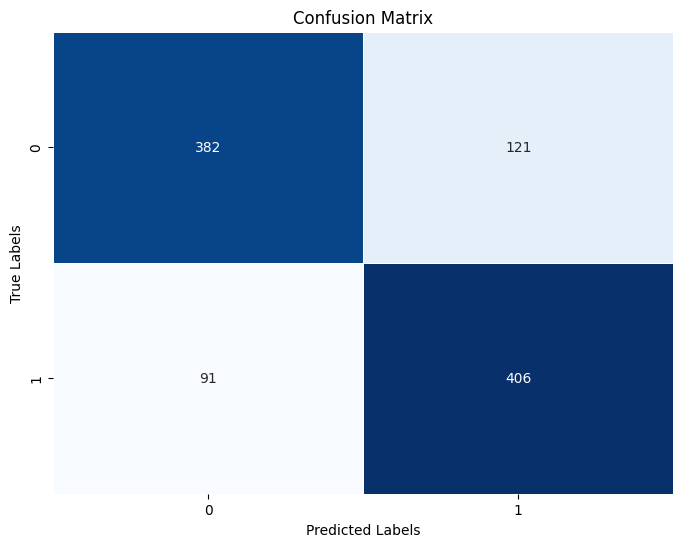

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", linewidths=.5, cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Here's how you can interpret the results:

The rows in the matrix represent the true labels (ground truth).

The columns represent the predicted labels made by your classification model.

The numbers within the matrix indicate the counts of instances falling into different categories.

1. **382** instances were correctly classified as "positive" **(true positives)**. This means that your model correctly predicted positive cases.

2. **121** instances were incorrectly classified as "positive" when they were actually "negative" **(false positives)**. These are cases where your model made a positive prediction, but it was incorrect.

3. **91** instances were incorrectly classified as "negative" when they were actually "positive" **(false negatives)**. These are cases where your model made a negative prediction, but it was incorrect.

4. **406** instances were correctly classified as "negative" **(true negatives)**. This means that your model correctly predicted negative cases.

# Task 1.

Using the confusion matrix calculate and explain metrics like accuracy, precision, recall, and F1-score

In [ ]:
# your code here

# Task 2 (Bonus)

Integrate the sentiment analysis classifier with flask.

In [ ]:
# your code here